<a href="https://colab.research.google.com/github/laidouniyoussef/MarchingSquare/blob/main/MARCHINGSQUARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

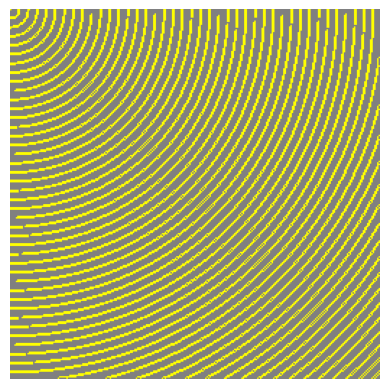

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
from PIL import Image, ImageDraw

class Square():
    def __init__(self):
        self.A = [0, 0]
        self.B = [0, 0]
        self.C = [0, 0]
        self.D = [0, 0]
        self.A_data = 0.0
        self.B_data = 0.0
        self.C_data = 0.0
        self.D_data = 0.0

    def get_case_id(self, threshold):
        case_id = 0
        if self.A_data >= threshold:
            case_id |= 1
        if self.B_data >= threshold:
            case_id |= 2
        if self.C_data >= threshold:
            case_id |= 4
        if self.D_data >= threshold:
            case_id |= 8
        return case_id

    def get_lines(self, threshold):
        lines = []
        case_id = self.get_case_id(threshold)

        if case_id in (0, 15):
            return []

        if case_id in (1, 14, 10):
            pX = (self.A[0] + self.B[0]) / 2
            pY = self.B[1]
            qX = self.D[0]
            qY = (self.A[1] + self.D[1]) / 2
            lines.append((pX, pY, qX, qY))

        if case_id in (2, 13, 5):
            pX = (self.A[0] + self.B[0]) / 2
            pY = self.A[1]
            qX = self.C[0]
            qY = (self.A[1] + self.D[1]) / 2
            lines.append((pX, pY, qX, qY))

        if case_id in (3, 12):
            pX = self.A[0]
            pY = (self.A[1] + self.D[1]) / 2
            qX = self.C[0]
            qY = (self.B[1] + self.C[1]) / 2
            lines.append((pX, pY, qX, qY))

        if case_id in (4, 11, 10):
            pX = (self.C[0] + self.D[0]) / 2
            pY = self.D[1]
            qX = self.B[0]
            qY = (self.B[1] + self.C[1]) / 2
            lines.append((pX, pY, qX, qY))

        elif case_id in (6, 9):
            pX = (self.A[0] + self.B[0]) / 2
            pY = self.A[1]
            qX = (self.C[0] + self.D[0]) / 2
            qY = self.C[1]
            lines.append((pX, pY, qX, qY))

        elif case_id in (7, 8, 5):
            pX = (self.C[0] + self.D[0]) / 2
            pY = self.C[1]
            qX = self.A[0]
            qY = (self.A[1] + self.D[1]) / 2
            lines.append((pX, pY, qX, qY))

        return lines

def marching_square(x_vector, y_vector, data, threshold):
    lines_list = []

    height = len(data)  # rows
    width = len(data[0])  # cols

    if (width == len(x_vector)) and (height == len(y_vector)):
        squares = np.full((height - 1, width - 1), Square())

        for j in range(height - 1):  # rows
            for i in range(width - 1):  # cols
                a = data[j + 1, i]
                b = data[j + 1, i + 1]
                c = data[j, i + 1]
                d = data[j, i]
                A = [x_vector[i], y_vector[j + 1]]
                B = [x_vector[i + 1], y_vector[j + 1]]
                C = [x_vector[i + 1], y_vector[j]]
                D = [x_vector[i], y_vector[j]]

                squares[j, i].A_data = a
                squares[j, i].B_data = b
                squares[j, i].C_data = c
                squares[j, i].D_data = d

                squares[j, i].A = A
                squares[j, i].B = B
                squares[j, i].C = C
                squares[j, i].D = D

                lines = squares[j, i].get_lines(threshold)
                lines_list.extend(lines)
    else:
        raise AssertionError("Dimensions of input data do not match the provided vectors.")

    return lines_list



######### F(x,y) = sqrt(x^2+y^2) #########
def radial_gradient(x, y):
    return (x**2 + y**2)**0.5

######### F(x,y) = cos(sqrt(x^2+y^2)) #########
def cosine_ring(x, y):
    return math.cos((x**2 + y**2)**0.5)

######### F(x,y) = x^2+y^2 -500 #########
def polynomial_function(x, y):
    return x**2 + y**2 - 500


######### F(x,y)=e^(-(x^2+y^2)/1000.0) #########
def gauss_function(x, y):
    return math.exp(-(x**2 + y**2) / 1000.0)

def main():
    x = [i for i in range(256)]
    y = [i for i in range(256)]

    ######### F(x,y) = sin(x)*cos(y) #########
    #example_grid = np.array([[math.sin(i / 10.0) * math.cos(j / 10.0) for j in range(256)] for i in range(256)])

    ######### Décroissance Gaussienne #########
    #example_grid = np.array([[math.exp(-(i**2 + j**2) / 1000.0) for j in range(256)] for i in range(256)])

    ######### Radial Gradient #########
    #example_grid = np.array([[radial_gradient(i, j) for j in range(256)] for i in range(256)])

    ######### Cosine Ring #########
    example_grid = np.array([[cosine_ring(i, j) for j in range(256)] for i in range(256)])

    ######### Polynomial Function #########
    #example_grid = np.array([[polynomial_function(i, j) for j in range(256)] for i in range(256)])

    im = Image.new('RGB', (256, 256), (128, 128, 128))

    collection = marching_square(x, y, example_grid, 0.9)

    draw = ImageDraw.Draw(im)

    for line in collection:
        draw.line(line, fill=(255, 255, 0), width=1)

    plt.axis("off")
    plt.imshow(im)
    plt.show()

if __name__ == '__main__':
    main()
